In [57]:
import numpy as np
import numba as nb
import os
import matplotlib.pyplot as plt

So i have created a funciton for $\rho$ "density" that inputs T and an matrix of particle masses and g values, (one for fermions and one for bosons) and outputs the total density of all the particles in those matrices. This funciton then goes into a function for $g_*$ "gstar" that calculates $g_*$ for the given density, given T and the particle matrices. 

1. Add loops for arrays- figure out way to loop through better/more generally 2*(2j+1) thing


In [58]:
#mass values
#fermions
m_e = 0.511
m_mu = 105.7
m_tau = 1777
ve = 0
vmu = 0
vtau = 0
proton = 938.272
neutron = 939.565

#bosons
pion_pm = 139.57039
pion_0 = 134.9768
kaon_pm = 493.677
kaon_0 = 497.613
eta = 547.862
eta_p = 957.78
rho_pm = 775.11
rho_0 = 775.26
##maybe make a huge list of all the particles and then be like if mass is less than 1 Gev then for i in range mass, g, in LIST OF PARTICLES

In [67]:
@nb.jit(nopython=True)
def fermion_integrand(x, m, T): 
    return np.sqrt(x**2+(m/T)**2) * (x**2)/(np.exp(np.sqrt(x**2+(m/T)**2))+1) * np.exp(x)

@nb.jit(nopython=True)
def boson_integrand(x, m, T):
    return np.sqrt(x**2+(m/T)**2) * (x**2)/(np.exp(np.sqrt(x**2+(m/T)**2))-1) * np.exp(x)

x_lagauss, w_lagauss = np.polynomial.laguerre.laggauss(40)
@nb.jit(nopython=True)
def rho(m, g, T, integrand):
    rho_vals = (g/2)*T**4/np.pi**2 * integrand(x_lagauss, m, T) * w_lagauss
    return np.sum(rho_vals)

fermions = np.array([[mve, 2], [mvmu, 2], [mvtau, 2], [m_e, 4], [m_mu, 4], [m_tau, 4], [m_p, 2], [m_n, 2] ])
bosons = np.array([[0,2], [pion_pm, 2], [pion_0, 1], [kaon_pm, 2], [kaon_0, 2] , [eta, 1] , [eta_p, 1] , [rho_pm, 6], [rho_0, 3]])


@nb.jit(nopython=True)
def density(T, mass_gf, mass_gb):
    density_val_f = 0 
    density_val_b = 0 
    for massf, gf in mass_gf:
        density_val_f += rho(massf, gf, T, fermion_integrand)
    for massb, gb in mass_gb:
        density_val_b += rho(massb, gb, T, boson_integrand)
    return density_val_f + density_val_b

@nb.jit(nopython=True)
def gstar(T, mass_gf, mass_gb):
    return 30/np.pi**2*density(T, mass_gf, mass_gb)/T**4

#print('T=10 MeV: photons+neutrinos g*=', gstar(10, fermions, bosons))
#print('T=500 MeV: photons+neutrinos g*=', gstar(500, fermions, bosons))
print('T=10 MeV: photons+neutrinos+leptons+pions g*=', gstar(10, fermions, bosons))
print('T=180 MeV: photons+neutrinos+leptons+pions g*=', gstar(180, fermions, bosons))
print('T=500 MeV: photons+neutrinos+leptons+pions g*=', gstar(500, fermions, bosons))

T=10 MeV: photons+neutrinos+leptons+pions g*= 10.759743332407645
T=180 MeV: photons+neutrinos+leptons+pions g*= 21.81760377304866
T=500 MeV: photons+neutrinos+leptons+pions g*= 33.11796216295688


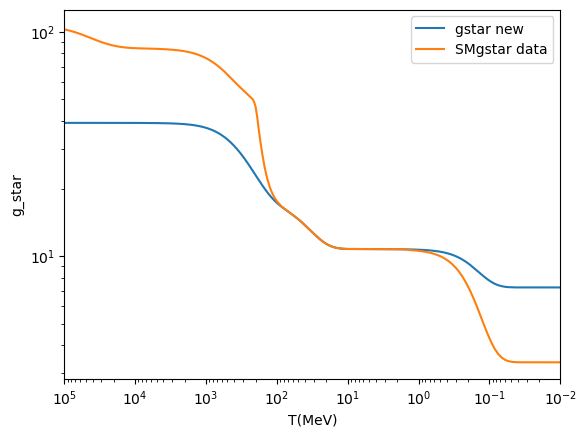

In [68]:
T = np.loadtxt("SMgstar.dat", usecols = 0, unpack = True)
gstar_old = np.loadtxt("SMgstar.dat", usecols = 1, unpack = True)
gstar_plot_vals = np.zeros(len(T))

for i in range(len(T)):
    gstar_plot_vals[i] = gstar(T[i], fermions, bosons)


plt.figure()
plt.loglog(T, gstar_plot_vals)
plt.loglog(T, gstar_old)
plt.xlim(1e5,1e-2)
plt.ylabel('g_star')
plt.xlabel('T(MeV)')
plt.legend(['gstar new', 'SMgstar data'])
plt.show()

#### FUNCTION THAT PLOTS $g_*$.. just for fun

In [5]:
def plot_gstar(T, mass_g_vals, title, lo_x, hi_x):
    for i in range(len(T)):
        gstar_plot_vals[i] = gstar(T[i], mass_g_vals)
    plt.figure()
    plt.loglog(T, gstar_plot_vals)
    plt.xlim(lo_x, hi_x)
    plt.ylabel('g_star')
    plt.xlabel('T(MeV)')
    plt.title(title)
    plt.show()
    
T = np.loadtxt("SMgstar-Copy1.dat", usecols = 0, unpack = True)
gstar_plot_vals = np.zeros(len(T))

plot_gstar(T, normal_phase, 'gamma+nu+L', 1e6, 1e-3)
plot_gstar(T, just_pho_and_nu, 'gamma+nu', 1e6, 1e-3)
#print(gstar_plot_vals)

OSError: SMgstar-Copy1.dat not found.